In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys
import pickle as _pkl
import itertools as _itr

import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

In [4]:
PARS = _pnd.read_table('data/pars.txt', sep=',')
GENO = _nmp.loadtxt('data/1000G_chr7_100K_200K_005pc_5pc.txt', dtype='int')
MAF = GENO.sum(0) / (2 * GENO.shape[0])

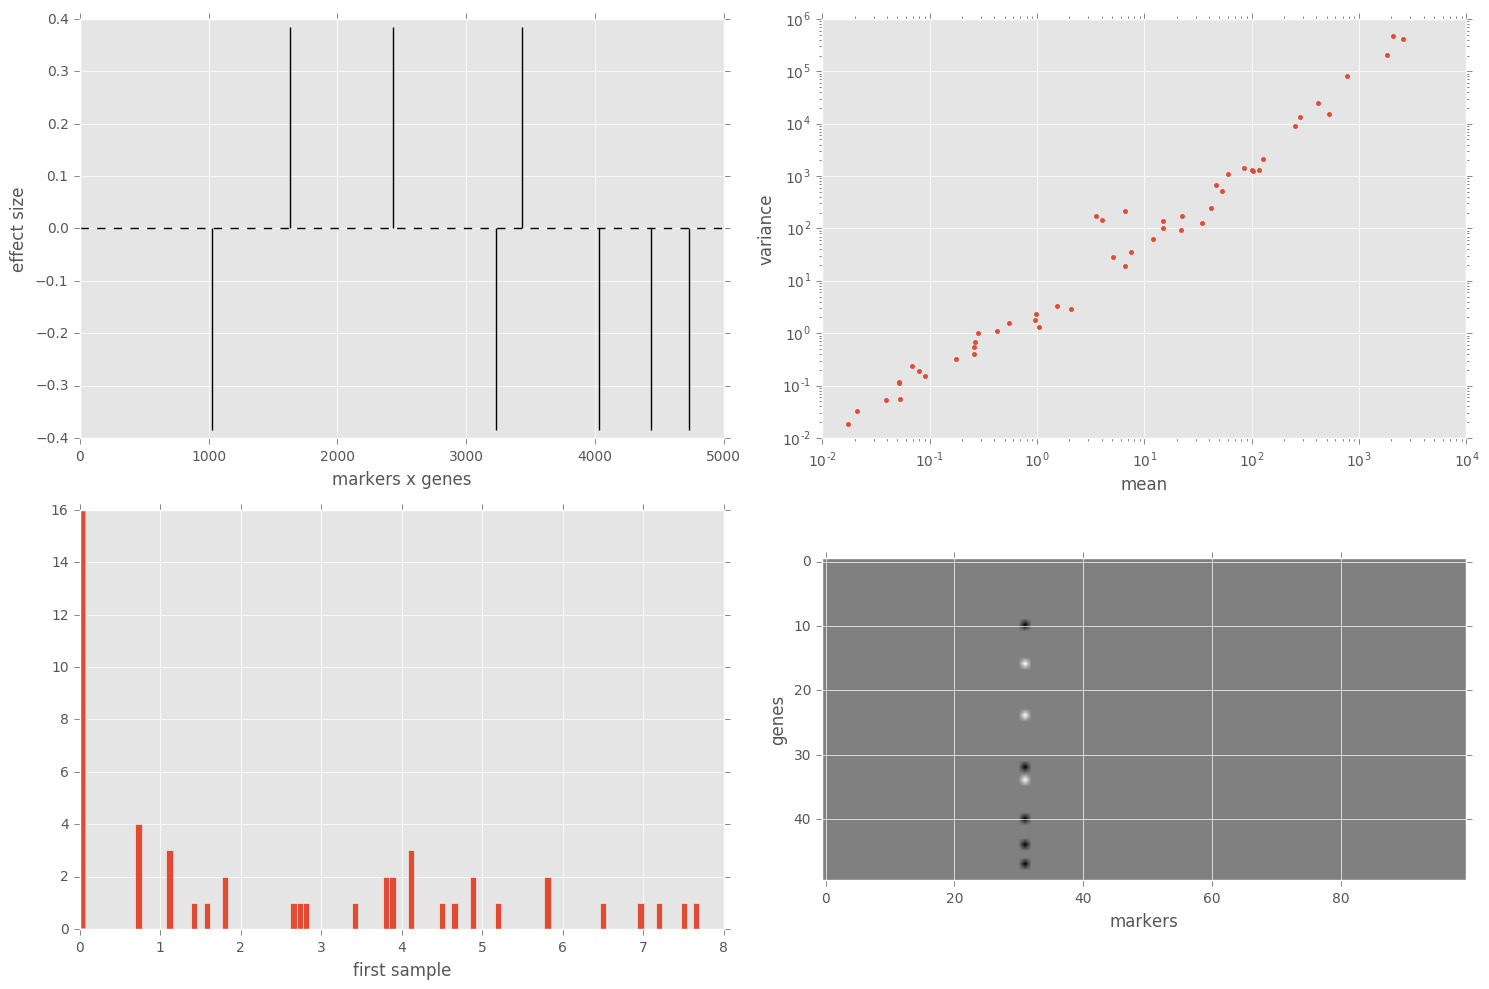

In [5]:
def fcn(n_samples=1000, n_markers=100, n_genes=50, pattern=(1, 8, 0, 0), size=4, pois=0., out=('S',0.1,5,10)):
    n_samples_max, n_markers_max = GENO.shape
    n_genes_max, _ = PARS.shape

    assert n_samples <= n_samples_max
    assert n_genes <= n_genes_max
    assert n_markers <= n_markers_max
    
#     G = GENO[:n_samples,:n_markers]
    G = _assoc.simulate_genotypes(MAF, n_samples, n_markers)['G']
    
    idxs = _rnd.choice(n_genes_max, n_genes, replace=False)
    mu = PARS['mu'].values[idxs]
    phi = PARS['phi'].values[idxs]
    
    pheno = _assoc.simulate_eQTLs(G, mu, phi, pattern=pattern, size=size, pois=pois, out=out)

    _plt.figure(figsize = (15,10));
    _plt.subplot(2,2,1); _plt.vlines(range(n_markers * n_genes), 0, pheno['beta'].ravel()); 
    _plt.axhline(linestyle='--', color='k'); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
    _plt.subplot(2,2,2); _plt.loglog(pheno['mu'], pheno['mu'] + pheno['mu']**2 * pheno['phi'], '.'); _plt.xlabel('mean'); _plt.ylabel('variance');
    _plt.subplot(2,2,3); _plt.hist(_nmp.log(pheno['Z'][:,0]+1), 100); _plt.xlabel('first sample');
    _plt.subplot(2,2,4); _plt.imshow(pheno['beta'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes')

    _plt.tight_layout()
    
    return {'G': G, **pheno}

##
data = fcn()

In [9]:
with open('data/simdata.pkl', 'wb') as fh:
    _pkl.dump(data, fh)